#  Text Pre-Processing - CountVectorizer and Document for NLP

#### Student Name: Kshitij Patil
#### Student ID: 29519136

Date:

Environment: Python 3.x and Jupyter notebook
Libraries used: 
* PyPDF2(PdfFileReader) - Helps in reading the pdf file.
* regex - a library extension for python for pattern matching (regular expression).
* collections - This library helps frequncy count of words within a list in the format of a dict.
* nltk - This library as an NLP based libarary rich in solving text processing problems.
* nltk.collocations - This will help in removing Bigrams with the help of PMI measures.
* nltk.tokenize -  It will be used for retokenization and also tokenize the sentences(MWEtokenizer,sent_tokenize).
* nltk.stem.porter - Stems the words into its root forms and makes plural into singular words.

## 1. Introduction:

This Task (task2) assess us on how we pre-process the data such that valuable words are maintained and are collected for document which also helps in building machine-learning model for recommender system.

We need to make a sparse tree representation by using the following these steps:
1. Use sent_tokenize to tokenize the senteces lowercase the first-letter combine the sentence.
2. Make the Unitcode and Synopsis-Assesment dict - tokenize each value.
3. Remove all the stop words and words with the length less than 3**.
4. Find the first 200 bi-grams and then retokenize the with dictionary.
5. Use Porter Stemmer to stem the letters **only non-captial letters.
6. Calculate the frequency of word in accross the document (DOCUMENT FREQUENCY).
7. Then calculate the threshold of the words and keep those words with frequency between 95% to 5%.
8. Index the vocab.txt and make the sparse tree generation(with) with respect to index in vocab.

These are the way the task will be solved and the reasons for it being done in this order will soon be discovered.

__NOTE* -  This is the further breakdown on the given tasks it still completes the 7 steps provided in the assignment but is done as i have implemented these steps the explanation is proided why these steps were taken__

## 2. Importing the Libraries

The libraries that are going to be imported with the reason is given under introduction

In [161]:
from PyPDF2 import PdfFileReader 
import re
import nltk
import collections
import itertools
from nltk.collocations import *
from nltk.tokenize import MWETokenizer,sent_tokenize      
from nltk.stem.porter import *

#THIS IS A DEPENDANCY OF SENTENCE-TOKENIZER THEREFORE WE ARE NEED TO DOWLOAD IT
nltk.download('punkt')

#Written so that the output block does not show
print() 

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/kshitijpatil/nltk_data...
[nltk_data]   Package punkt is already up-to-date!



In [162]:
'''
A rendunant function(not relating to the steps)
It just 'pretty prints the code' so that dictionry does not cogulate together
such that it becomes indistinguashble
'''
def pprint(x):
        for keys,values in x.items():
                print('\n')
                print(f'{keys} -->{values}')


In [163]:
# First is the regex to tokenize into words
word_tokenizer = r"\w+(?:[-']\w+)?"
#Helps us couple the UNITCODE:SYNOPSIS:ASSEMENT into a tuple of form ('UNITCODE','SYNOPSIS:ASSESMENT')
regex_coupling = r'(\w{3,4}\d{4})(.*?)]'

THIS HOW THE REGEX WORKS


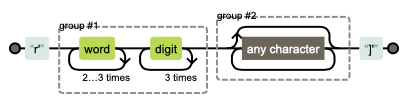

In [164]:
print("THIS HOW THE REGEX WORKS")
from IPython.display import Image
Image(filename='image.png')


In [165]:
# Taken the stopwords txt which has stop
with open('stopwords_en.txt','r') as f:
        #Split the data as the stopwords are in newlines
        tokenized_stopwords = f.read().split()

## 2. Reading the PDF
The PDF is read and grouped accofing to regex coupling and then it is brokendown into sentecnces using sent_tokenize the reason sent tokenize was used is to lower case the first letter as the first letter is always capital and also need to maintain in letter that are capital in between the sentences.

In [166]:
#THIS IS WHERE THE PDF IS READ THE FIRST LETTER IS LOWERCASED AND THE NEXT STEPS ARE TOKENIZED
pdf = PdfFileReader('29519136.pdf')
the_list = []
for x in range(pdf.getNumPages()):
        #GET PAGES 
        pages = pdf.getPage(x).extractText()
        #SENTENCE TOKENIZE THEM
        sentences = sent_tokenize(pages)
        #FIND THE PAGES LOWER CASE THE FIRST LETTER AND RETURN
        for each_sentence in range(len(sentences)):
                sentences[each_sentence] = sentences[each_sentence].split()[0].lower()+' '+' '.join(sentences[each_sentence].split()[1:])
        #IN THIS LINE WE WILL JOIN        
        pages = ' '.join(sentence for sentence in sentences)
        #WORD TOKENIZE AND EXTEND THE LIST
        the_list.extend(re.findall(regex_coupling,pages,re.DOTALL|re.MULTILINE))

## 3. Remove Stop Words and Word Length less Than 3:
##### Why remove the word length and the stop words now:
1. The stop words are totaly useless interms of vocab richness. _(more reason given in further sections)_
2. Length 3 words can be removed now with the stop words and though at the end vocab we will still encounter words length less than 3 _(Why and What is given in the further sections?)_ but this is knowingly being done.

In [167]:
#REMOVAL OF STOP WORDS AND WORD LESS LENGHT THAN 3 
second_dict = {}
new_list = []
for value in the_list: 
        local_list = []
        some_value = re.findall(tokenize,value[1],re.DOTALL|re.MULTILINE)
        for value2 in some_value:
                if value2 not in tokenized_stopwords:
                        if len(value2) > 3:
                                local_list.append(value2)
        second_dict[value[0]] = local_list                

#lets check how the pprint looks for after the removal of the words.       
pprint(second_dict)



ATS4375 -->['Topics', 'covered', 'include', 'critical', 'reading', 'social', 'science', 'research', 'literature', 'research', 'planning', 'design', 'execution', 'research', 'ethics', 'presentation', 'skills', 'students', 'critically', 'examine', 'current', 'research', 'major', 'field', 'Journalism', 'Australian', 'Indigenous', 'studies', 'undertake', 'focused', 'original', 'research', 'project', 'topic', 'execution', 'project', 'approved', 'supervised', 'lecturer', 'critically', 'examine', 'review', 'current', 'research', 'major', 'field', 'discipline', 'design', 'develop', 'minor', 'research', 'project', 'develops', 'knowledge', 'field', 'participate', 'seminars', 'required', 'discuss', 'develop', 'project', 'collegially', 'effectively', 'locate', 'access', 'review', 'relevant', 'literature', 'selected', 'field', 'research', 'produce', 'scholarly', 'essay', 'cogently', 'presents', 'outcomes', 'research']


fit1008 -->['This', 'unit', 'introduces', 'students', 'core', 'problem-solvin

We make a common list because we need to remove the bigram:

__why make the common list instead of making bigrams from the individual documents ?__

Answer: The way the Bigram works is its see the occurences and the __frequency__ of occurences of words the best way the library will work will be from the entire vocab (as it will get better frequency of two words occuring together).


In [168]:
common_list = []        
new_list = []
for x in range(len(the_list)):
        new_list=re.findall(tokenize,the_list[x][1],re.DOTALL|re.MULTILINE) 
        common_list.extend(new_list)

## 4. Finding the Bi-grams and Re-Tokenizing:


__Why are the bigrams removed after the stop words?__

Answer: The Bigrams are removed after stop words because stop words constitute the major part of any language though it has semantic richness it has little to knwo syntatic richness (in the sense does not tell anything about a subject in bag word manner).


If keep the stop words at the begining and then remove the bigram the __bigram would be made of stop words__ which is usesless.

__Why is Bigram of Stop Words "_normally_" uselss?__

Answer: Normally Bigrams points out to the words that are normally spoken to together in this context we will get bigrams like  __is_a__ , __to_the__ etc which add no value we would rather search for "_proverbs_ _nouns_" etc which would give more meaning.





In [169]:
bigrams = nltk.collocations.BigramAssocMeasures()
bigram_remover = nltk.collocations.BigramCollocationFinder.from_words(common_list)
top_200_bigrams =bigram_remover.nbest(bigrams.pmi,200)
print('LENGTH: '+ str(len(top_200_bigrams))+'\n'+str(top_200_bigrams))

LENGTH: 200
[('1911', 'Revolution'), ('2019', 'Introduction'), ('60', '000-40'), ('72', 'credit'), ('ABS', 'Tablebuilder'), ('ACS3730', 'Essential'), ('AFS2730', 'ACS2730'), ('AFS2740', 'ACS2740'), ('ANMC', 'National'), ('AS', 'NZS1170'), ('Access', 'databases'), ('Actively', 'seek'), ('Aeromedical', 'Management'), ('America', 'Modern'), ('Aristophanes', 'Plato'), ('Aspen', 'Plus'), ('Bayes', 'Theorem'), ('British', 'sovereignty'), ('COMSOL', 'Multiphysics'), ('Clairvaux', 'Bonaventure'), ('Competency', 'Standards'), ("Coroner's", 'court'), ('Corpus', 'Linguistics'), ('Criminology', 'Overseas'), ('DSMP-IV', 'TR'), ('Diagnostic', 'Statistical'), ('Disorders', 'Text'), ('Experience', 'Placement'), ('Facebook', 'Sina'), ('Feel', 'confident'), ('Fine', 'Art'), ('Geriatric', 'Pharmacy'), ('Graphic', 'User'), ('HIV', 'AIDS'), ('History', 'Think'), ('Homeric', 'Ionic'), ('Human', 'Services'), ('IP', 'web'), ('IV', 'Elicit'), ('Ice', 'Age'), ('Immanuel', 'Levinas'), ('International', 'Definiti



Lets take these bigrams and retokenize the vocab and list and then aging make a dictionary



In [170]:
mwetokenizer = MWETokenizer(top_200_bigrams)
second_dict_bigrams =  dict((keys, mwetokenizer.tokenize(values)) for keys,values in second_dict.items())

## 5. Stemming the words:

__Why are we stemming the words now?__

Answer: The reason of choosing to stem the words now is because we can exclude the Bigram from getting stemmed which will cause the bigram to majoritarly loosing its meanning. As _per the requirement_ we will __not stem the upper case letters__ as normally upper case letters in between words are Nouns or Pronoun it will normally wont have a base word assosiated with it.

Another Key Note is after stemming majority of the words we will notice that many words also fall into the category of length 3 words the reason i am keeping these words is based on the _"assumption"_ that stemming causes some words to loose its meaning and reduce it into smaller format __majority of the time the word looses its meaning__ 


In [171]:
stemmer = PorterStemmer()
lematized_list = []
for keys,values in second_dict_bigrams.items():
        lematized_list = []
        for value in values:
                if not value.isupper() or '_' not in value:
                        lematized_list.append(stemmer.stem(value))
                else:
                        lematized_list.append(value)         
        second_dict_bigrams[keys] = lematized_list

## 6. Get The Frequency Of The Words And Remove Words (95%> or <5%):

We will now calculate the the frequency of the word:

The frequency of the word as per document = __frequency of words / Number of documents__

Then we will remove all the words from the less than 95% to 5% values.

Where,
95% is for common words and 5% is for rare tokens

**NOTE: Though all the bigrams would be removed in this task but since the bigrams was needed to be maintained we will not bigrams go under threshold removal.

In [172]:
#MAKES A LIST OF UNIQUE WORDS IN ALL THE DOCUMENTS THEN COUNTS THEM TO GET THE FREQUENCY OF OCCURENCES WRT TO DOCUMENTS
common_rare = []
for values in second_dict_bigrams.values():
        set_values = list(set(values))
        common_rare.extend(set_values)
counts = dict(collections.Counter(common_rare))
print("The words before removing the thresholds")
print(len(counts))

The words before removing the thresholds
2419


In [173]:
# Lets make a list of all the words that needs to be removed
remove_word =[]
for keys,values in counts.items():
    if '_' not in keys:
        frequency = values/199
        if frequency > 0.95 or frequency < 0.05:
                remove_word.append(keys)
print('Threshold words: '+str(len(remove_word)))

Threshold words: 1983


In [174]:
#Remove the unclean words from the sparse dictionary
for keys,values in second_dict_bigrams.items():
        rare_common_cleaned = []
        for value in values:
                if value not in remove_word:
                        rare_common_cleaned.append(value)
        second_dict_bigrams[keys] = rare_common_cleaned
print(f'After removing the words we should get : {len(counts)-len(remove_word)}')        

After removing the words we should get : 436


## 7. MAKING THE SPARSE GENRATION:

Sparse tree generation is used to make unique key,values.
We have to generate a spare vectore which consists of a key,which is the word in the file,while the value 
to the key is the frequency of occurance of the word in the documents. 
Here to generate the spare vector every word in trail_dict was index and depending on their index spare vector 
for each word is generated.

Later on we will change it with the Index:Frequency

The index will be the index from


In [175]:
#Make the frequency count of the documents
for keys,values in second_dict_bigrams.items():
     second_dict_bigrams[keys] = dict(collections.Counter(values))
pprint(second_dict_bigrams)        



ATS4375 -->{'topic': 2, 'cover': 1, 'includ': 1, 'critic': 3, 'read': 1, 'social': 1, 'scienc': 1, 'research': 9, 'literatur': 2, 'plan': 1, 'design': 2, 'ethic': 1, 'present': 2, 'skill': 1, 'student': 1, 'examin': 2, 'current': 2, 'major': 2, 'field': 4, 'australian': 1, 'studi': 1, 'undertak': 1, 'focus': 1, 'origin': 1, 'project': 4, 'supervis': 1, 'review': 2, 'disciplin': 1, 'develop': 3, 'knowledg': 1, 'requir': 1, 'discuss': 1, 'effect': 1, 'relev': 1, 'select': 1, 'produc': 1, 'outcom': 1}


fit1008 -->{'thi': 1, 'unit': 1, 'introduc': 1, 'student': 1, 'core': 1, 'analyt': 1, 'skill': 1, 'methodolog': 1, 'develop': 1, 'softwar': 1, 'cover': 1, 'rang': 1, 'conceptu': 1, 'level': 2, 'model': 1, 'languag': 3, 'program': 2, 'topic': 1, 'includ': 1, 'data': 4, 'type': 3, 'structur': 1, 'complex': 2, 'problem': 1, 'implement': 2, 'test': 1, 'compar': 1, 'properti': 1, 'basic': 2, 'lists_tre': 1, 'evalu': 1, 'analys': 1, 'determin': 1, 'case': 2, 'time': 1, 'MIPS_R2000': 1}


fit44

Making the word index of the file thi will be our __VOCAB__

In [176]:
#Making an indexed vocab text
vocab_index = {}
repeating_vocab = []
vocab = []
for values in second_dict_bigrams.values():
        repeating_vocab.extend(values)        
vocab.extend(list(set(repeating_vocab)))
vocab.sort()   
print(f'VOCABULARY {len(vocab)}')
trial_dict = { word:num+1 for num,word in enumerate(vocab)}
trial_dict

VOCABULARY 436


{'1911_revolut': 1,
 '2019_introduct': 2,
 'AFS2730_ACS2730': 3,
 'AFS2740_ACS2740': 4,
 'MIPS_R2000': 5,
 'abil': 6,
 'abortion_euthanasia': 7,
 'academ': 8,
 'access_databas': 9,
 'accessible_record': 10,
 'account': 11,
 'accur': 12,
 'acquir': 13,
 'acquiring_explicit': 14,
 'acquisit': 15,
 'activ': 16,
 'actively_seek': 17,
 'actuator_disc': 18,
 'addit': 19,
 'address': 20,
 'adequately_research': 21,
 'advanc': 22,
 'aerial_vehicl': 23,
 'aeromedical_manag': 24,
 'affect': 25,
 'aim': 26,
 'analys': 27,
 'analysi': 28,
 'analyt': 29,
 'anmc_nat': 30,
 'anxiety_depress': 31,
 'apoptosis_haematopoiesi': 32,
 'appli': 33,
 'applic': 34,
 'apprais': 35,
 'appreci': 36,
 'approach': 37,
 'area': 38,
 'argument': 39,
 'aristophanes_plato': 40,
 'articul': 41,
 'artificial_intellig': 42,
 'aspect': 43,
 'aspen_plu': 44,
 'assess': 45,
 'australia': 46,
 'australian': 47,
 'automatism_insan': 48,
 'autonomic_nerv': 49,
 'bacterial_infect': 50,
 'base': 51,
 'basic': 52,
 'bayes_theorem

Creating the Sparse Matrix of word and frequency and then adding the indexes from the vocab to the word.
This is the file that needs to be generated and then writing it into the files.

In [177]:
outer_list=[]
for key,values in second_dict_bigrams.items():
        #print(key)
        other_dict = {}
        other_list =[]
        for  keys,values in second_dict_bigrams[key].items():
                #print(second_dict_bigrams[key])
                other_other_list = []
                try:
                    other_dict[trial_dict[keys]]=values
                    
                    other_list.append([values,trial_dict[keys]])
                except:
                    pass
        outer_list.append(other_list)
        second_dict_bigrams[key] = other_dict
pprint(second_dict_bigrams)        



ATS4375 -->{417: 2, 107: 1, 225: 1, 110: 3, 350: 1, 380: 1, 372: 1, 361: 9, 267: 2, 327: 1, 123: 2, 163: 1, 332: 2, 379: 1, 393: 1, 168: 2, 113: 2, 272: 2, 182: 4, 47: 1, 394: 1, 422: 1, 186: 1, 313: 1, 341: 4, 396: 1, 366: 2, 135: 1, 126: 3, 258: 1, 360: 1, 138: 1, 151: 1, 357: 1, 375: 1, 336: 1, 314: 1}


fit1008 -->{412: 1, 423: 1, 248: 1, 393: 1, 103: 1, 29: 1, 379: 1, 282: 1, 126: 1, 382: 1, 107: 1, 349: 1, 91: 1, 263: 2, 287: 1, 259: 3, 340: 2, 417: 1, 225: 1, 116: 4, 419: 3, 392: 1, 86: 2, 334: 1, 219: 2, 407: 1, 82: 1, 342: 1, 52: 2, 266: 1, 165: 1, 27: 1, 125: 1, 65: 2, 415: 1, 5: 1}


fit4444 -->{412: 1, 423: 2, 361: 9, 103: 1, 360: 1, 211: 3, 294: 3, 431: 1, 349: 1, 341: 5, 419: 1, 393: 1, 87: 2, 330: 1, 251: 1, 382: 1, 126: 2, 174: 1, 410: 1, 123: 3, 263: 1, 343: 1, 110: 1, 366: 1, 267: 1, 359: 1, 184: 2, 165: 1, 375: 1, 281: 1, 404: 1, 116: 1, 78: 1, 28: 1, 135: 1, 92: 1, 163: 1, 81: 1, 435: 1, 309: 1, 187: 1, 230: 1, 378: 1}


psy6399 -->{75: 4, 393: 4, 308: 1, 101: 1, 

In [178]:
#Bringing it into the right format before writing it into file
string =''
for key1,value1 in second_dict_bigrams.items():
        string += '\n'
        string += f'{key1.upper()},'
        for  keys2 in sorted(second_dict_bigrams[key1].keys()):
                #print(keys2)
                string += f' {keys2}:{second_dict_bigrams[key1][keys2]},'

In [179]:
#writing the sparse matrix into the file
with open('29519136_countVec.txt','w') as f:
        f.write(string)   

In [180]:
#making the vocab into the required format
string2 =''
for key2,value2 in trial_dict.items():
        string2 += f'{key2}:{value2}\n'

#writing the vocab in that format
with open('29519136_vocab.txt','w') as f2:
        f2.write(string2)     

## 8. Conclusion

This tasks shows us the depths of text processiong and also touches the topic of NLP (Natural Language Processing) with topics like stemming, vocab genration, threshold, document frequence and also others. It helps us understand how data can be formatted processed to make sparse trees which later help us to make machine learning algorithm.